In [1]:
# Librerías
import os
import pandas as pd
import numpy as np
import openpyxl
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import train_test_split

In [2]:
import scipy.stats as ss

Centrado en el tratamiento de los datos. El procesamiento de datos es una etapa clave para garantizar que los algoritmos de modelado funcionen de manera eficiente y precisa. A continuación, se detalla el enfoque estructurado para preparar y transformar los datos:

Va a seguir la siguiente estructura:

1.⁠ ⁠Separación Train y Test: La división de los datos en conjuntos de entrenamiento y prueba es esencial para evaluar la capacidad del modelo para generalizar a nuevos datos.
2.⁠ ⁠Tratamiento de outliers: Los valores atípicos pueden sesgar los resultados del modelo o influir negativamente en el rendimiento.

3.⁠ ⁠Análisis de relaciones entre variables 

    3.1. Matriz de correlación. Calcula las correlaciones entre variables numéricas usando el coeficiente de Pearson. Ayuda a identificar multicolinealidad, es decir, relaciones muy fuertes entre variables independientes, lo que puede afectar el rendimiento del modelo.

    3.2. Matriz de Cramer. Para evaluar relaciones entre variables categóricas, se utiliza la V de Cramer, un indicador de asociación que varía entre 0 (sin relación) y 1 (relación perfecta).
    Esto permite identificar qué variables categóricas tienen una relación significativa entre sí o con la variable objetivo, ayudando a decidir si es necesario combinarlas, transformarlas o eliminarlas.

4.⁠ ⁠WOE y Valor de la Información (Information Value). Ayuda a evaluar la calidad predictiva de las variables

In [4]:
# Obtener la ruta del directorio de trabajo actual
ruta_actual = os.getcwd()
ruta_actual

'/Users/frida23/Desktop/Master Ciencia de Datos/Aprendizaje Automático/Practica1_EDA/notebooks'

In [5]:
#lectura del dataset
data = '../data/interim/df_loans_N1.csv'
df_loans = pd.read_csv(data)
df_loans.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#También se va a importar el diccionario de datos del dataset 

data_description = pd.read_excel('../data/columns_description.xlsx') 
data_description.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [7]:
#Se elimina la primera columna porque se repite el índice.
df_loans.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:

from sklearn.model_selection import train_test_split
X_df_loans_train, X_df_loans_test, y_df_loans_train, y_df_loans_test = train_test_split(df_loans.drop('TARGET',axis=1), 
                                                                     df_loans['TARGET'], 
                                                                     stratify=df_loans['TARGET'], 
                                                                     test_size=0.2)
df_loans_train = pd.concat([X_df_loans_train, y_df_loans_train],axis=1)
df_loans_test = pd.concat([X_df_loans_test, y_df_loans_test],axis=1)


Para nuestro conjunto de datos, se ha decidido utilizar el 20% del total para el entrenamiento, considerando que, al tratarse de un dataset grande, esta proporción es suficiente para entrenar el modelo de manera efectiva y reservar una cantidad significativa de datos para evaluar su desempeño.

Esta elección también ayuda a mitigar problemas como el sobreajuste, ya que un conjunto de entrenamiento demasiado grande podría llevar al modelo a ajustarse en exceso a los datos, comprometiendo su capacidad de generalización frente a datos nuevos.

Inicialmente, la distribución 80/20 parece adecuada para las necesidades actuales, aunque no se descarta ajustar esta proporción en el futuro, por ejemplo, con un esquema 70/15/15 que incluya un conjunto dedicado a la validación cruzada.

In [9]:
# Proporción en el conjunto original
print("Distribución original:")
print(df_loans['TARGET'].value_counts(normalize=True))

# Proporción en el conjunto de entrenamiento
print("\nDistribución en el conjunto de entrenamiento:")
print(y_df_loans_train.value_counts(normalize=True))  

# Proporción en el conjunto de prueba
print("\nDistribución en el conjunto de prueba:")
print(y_df_loans_test.value_counts(normalize=True))  


Distribución original:
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

Distribución en el conjunto de entrenamiento:
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

Distribución en el conjunto de prueba:
TARGET
0    0.919272
1    0.080728
Name: proportion, dtype: float64


Se puede afirmar que la estratificación ha sido realizada de manera correcta ya que se preservan las proporciones de la variable objetivo para dataset de train como de test.

Se debe tener presente que la variable objetivo está muy desbalanceada. En este caso implica que hay muy pocos clientes que tengan dificultades en el pago del préstamo (8,07%) frente a una grán proporción de los clientes que no presentan dificultades a la hora de pagar (91.93%). Por ello, es posible que, previo a la ejecución del modelado, se requiera un procesamiento de oversampling para compensar de cierta manera ese desbalance.

## Tratamiento de Outliers

In [10]:
#primero se seleccionan las numéricas sin las buleanas
columnas_numericas_sin_booleanas = [col for col in df_loans_train.select_dtypes(include=[np.number]).columns if df_loans_train[col].dtype != 'bool']

# Ver los nombres de las columnas
print(columnas_numericas_sin_booleanas)


['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MO

In [11]:
pd.set_option('display.max_rows', None)

In [12]:
fa.get_deviation_of_mean_perc(df_loans_train, columnas_numericas_sin_booleanas, target='TARGET', multiplier=3)

,variable,sum_outlier_values,porcentaje_sum_null_values,0,1
68,FLAG_DOCUMENT_6,21700,0.088209,0.943594,0.056406
70,FLAG_DOCUMENT_8,20065,0.081562,0.924545,0.075455
90,TARGET,19860,0.080729,NaN,1.000000
16,REG_CITY_NOT_LIVE_CITY,19119,0.077717,0.877452,0.122548
10,FLAG_EMAIL,13964,0.056762,0.921871,0.078129
14,REG_REGION_NOT_WORK_REGION,12496,0.050795,0.909171,0.090829
15,LIVE_REGION_NOT_WORK_REGION,10008,0.040682,0.913269,0.086731
86,AMT_REQ_CREDIT_BUREAU_WEEK,6831,0.027767,0.921534,0.078466
5,REGION_POPULATION_RELATIVE,6792,0.027609,0.959806,0.040194
61,DEF_30_CNT_SOCIAL_CIRCLE,5504,0.022373,0.880451,0.119549


Dada la naturaleza del análisis actual y la distribución de los valores outliers identificados, no se considera prioritario tratarlos en esta etapa inicial. 
Muchas de las variables afectadas por valores extremos, como las banderas documentales o indicadores específicos, tienen un impacto relativamente pequeño en el conjunto total de datos (proporciones menores al 10%). Además, su naturaleza discreta sugiere que estos valores podrían representar información útil en lugar de ruido o errores.

No obstante, no se descarta la posibilidad de abordar los outliers en fases futuras del análisis, especialmente si afectan la estabilidad o el desempeño de modelos predictivos posteriores. El enfoque en este momento se centra en preservar la integridad de los datos y explorar cómo estas anomalías interactúan con la variable objetivo antes de tomar decisiones de tratamiento definitivo.

### Tratamiento de Valores Nulos 

In [20]:
def reemplazar_nulos_por_desconocido(df):
    """
    Reemplaza los valores nulos en el DataFrame por "desconocido".
    
    :param df: DataFrame con los datos a procesar.
    :return: DataFrame con los valores nulos reemplazados por "desconocido".
    """
    return df.fillna("desconocido")


In [ ]:
reemplazar_nulos_por_desconocido(df_loans_train)


## Análisis entre Variables 

### Relaciones entre variables numéricas: Correlation Matrix

In [16]:
boolean_columns = df_loans.columns[df_loans.isin([0, 1]).all()]

matrix_corr = pd.concat([df_loans_train.select_dtypes('number').drop(boolean_columns, axis=1), df_loans_train['TARGET']], axis=1).corr(method='pearson')
matrix_corr

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
SK_ID_CURR,1.000000e+00,-0.000555,0.001647,0.000166,0.000278,0.000523,-0.000121,-0.000928,0.000973,-0.000734,...,-0.000669,-0.000766,-0.000154,-0.002292,-0.002255,0.000219,0.000148,0.000872,0.004015,-0.001331
CNT_CHILDREN,-5.553097e-04,1.000000,0.023905,0.000298,0.020320,-0.003950,-0.027690,0.332115,-0.239921,0.183413,...,0.015632,-0.000233,-0.005577,0.000126,-0.001014,-0.004367,-0.011145,-0.007780,-0.041998,0.020295
AMT_INCOME_TOTAL,1.646570e-03,0.023905,1.000000,0.334673,0.410069,0.340824,0.161979,0.054653,-0.134649,0.060776,...,-0.026624,-0.027623,-0.042734,0.003533,0.008961,0.007192,0.060852,0.013123,0.031600,-0.019110
AMT_CREDIT,1.655701e-04,0.000298,0.334673,1.000000,0.769678,0.986961,0.100223,-0.056962,-0.065206,0.009483,...,-0.000154,-0.025076,-0.072185,-0.004539,0.003751,-0.001681,0.052235,0.015409,-0.047641,-0.029884
AMT_ANNUITY,2.781807e-04,0.020320,0.410069,0.769678,1.000000,0.774620,0.118646,0.008563,-0.103367,0.037590,...,-0.012438,-0.024849,-0.062108,0.003091,0.001967,0.013936,0.037118,0.009037,-0.010192,-0.011822
AMT_GOODS_PRICE,5.234370e-04,-0.003950,0.340824,0.986961,0.774620,1.000000,0.103825,-0.055080,-0.063175,0.010956,...,0.000039,-0.025863,-0.074707,-0.004014,0.004529,-0.001227,0.054084,0.015982,-0.050338,-0.039354
REGION_POPULATION_RELATIVE,-1.207975e-04,-0.027690,0.161979,0.100223,0.118646,0.103825,1.000000,-0.030076,-0.002155,-0.054783,...,-0.010372,0.003500,-0.042580,-0.001718,0.000670,-0.003330,0.078849,-0.001251,0.001680,-0.038120
DAYS_BIRTH,-9.284758e-04,0.332115,0.054653,-0.056962,0.008563,-0.055080,-0.030076,1.000000,-0.615041,0.331004,...,0.006520,0.001782,0.084989,0.006211,0.001477,-0.001645,0.001149,-0.010732,-0.071568,0.078131
DAYS_EMPLOYED,9.729365e-04,-0.239921,-0.134649,-0.065206,-0.103367,-0.063175,-0.002155,-0.615041,1.000000,-0.209662,...,0.006450,0.013475,0.020795,-0.005578,0.000990,0.003043,-0.033105,0.014200,0.049865,-0.044612
DAYS_REGISTRATION,-7.341531e-04,0.183413,0.060776,0.009483,0.037590,0.010956,-0.054783,0.331004,-0.209662,1.000000,...,0.008213,0.004138,0.057948,-0.001749,-0.000627,-0.001249,-0.011656,-0.000839,-0.023497,0.041333


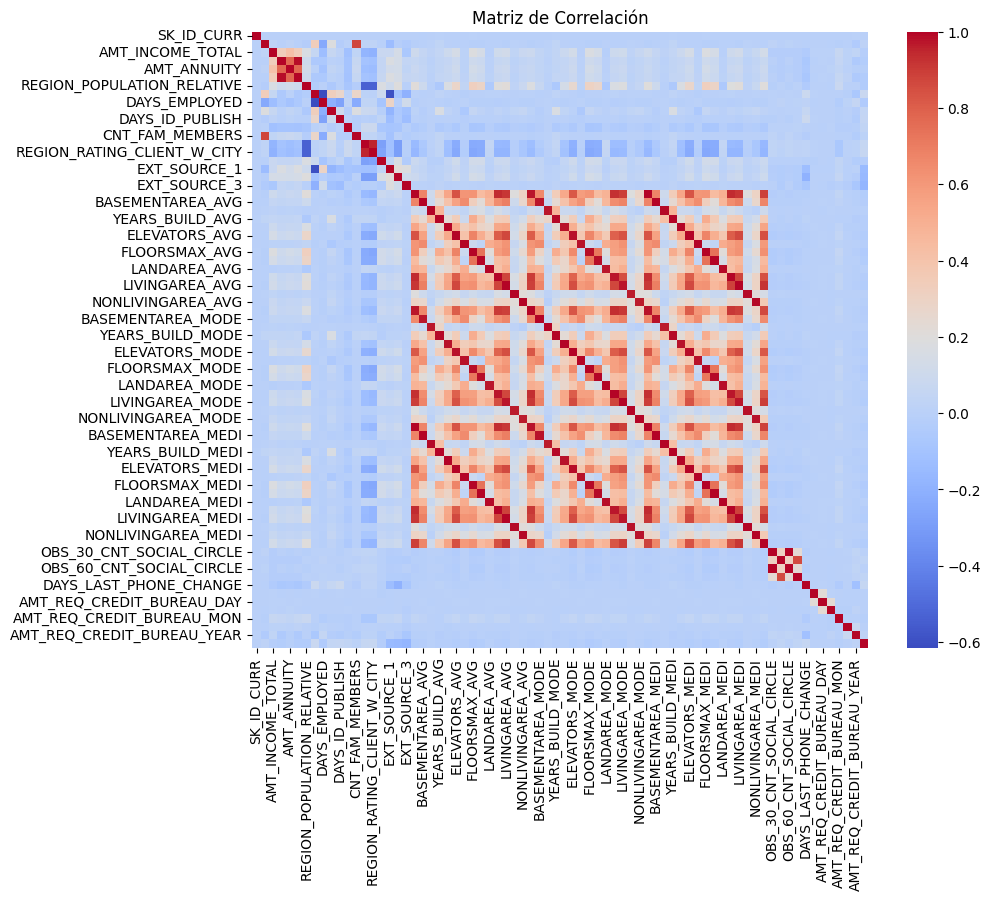

In [17]:
# Pintar la matriz de correlación con seaborn
plt.figure(figsize=(10, 8))  # Tamaño de la figura
sns.heatmap(matrix_corr, cmap='coolwarm', fmt='.2f', cbar=True, square=True)

# Añadir título
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()

##### CONCLUSIONES DE LA MATRIZ DE CORRELACIÓN




### Relaciones entre variables categóricas: Cramers V matrix

La matriz de Cramér se usa para medir la asociación entre dos variables categóricas. Su coeficiente, Cramér's V, va de 0 (sin relación) a 1 (relación perfecta). 

En este caso es de gran utilidad para analizar la dependencia en tablas de contingencia.

Para nuestro dataset de concesión de préstamo permitirá evaluar la relación entre variabes como "género", "tipo de casa", "materiales de la vivienda", "tipo de solicitante" etc con la variable TARGET que toma valor 1 si tuvo algún retraso en alguno de los pagos de la devolución del préstamo y 0 en cualquier otro caso.

Por ello un valor alto de Cramer´s matrix sugiere que esas variables tienen un impacto en la probabilidad de impago.

Para este caso solo se tenrán en cuenta estrictamente las variables con mas de 2 categorías para llevar a cabo el análisis ya que sumado a lo ya mencionado las variables buleanas se encuentran bastante debalanceadas por lo que se ha decidido evitar incluirlas ya que en estos casos, Cramér's V podría no ofrecerte una visión clara o útil de la relación.

In [ ]:
# Seleccionar las columnas numéricas que tienen solo valores 0 y 1
boolean_columns = df_loans.columns[df_loans.isin([0, 1]).all()]

# Convertir las columnas seleccionadas a tipo booleano
df_loans[boolean_columns] = df_loans[boolean_columns].astype(bool)

# Verifica si las columnas han sido convertidas correctamente
print(df_loans.dtypes)

SK_ID_CURR                      int64
TARGET                           bool
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object


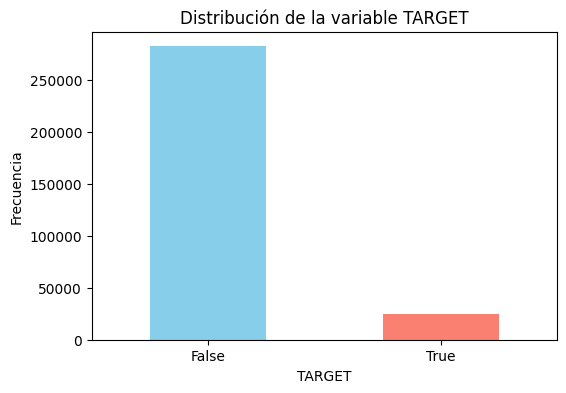

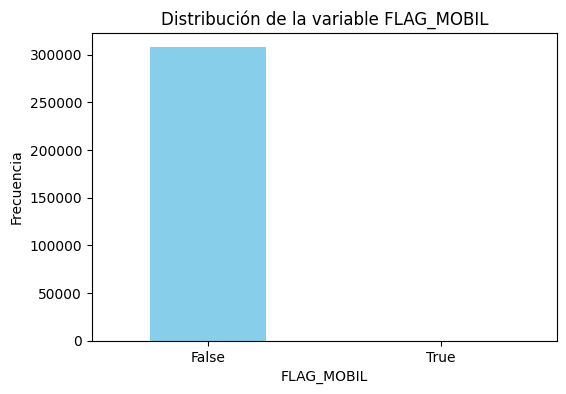

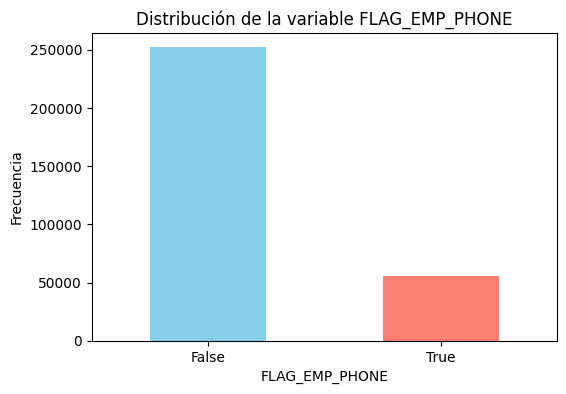

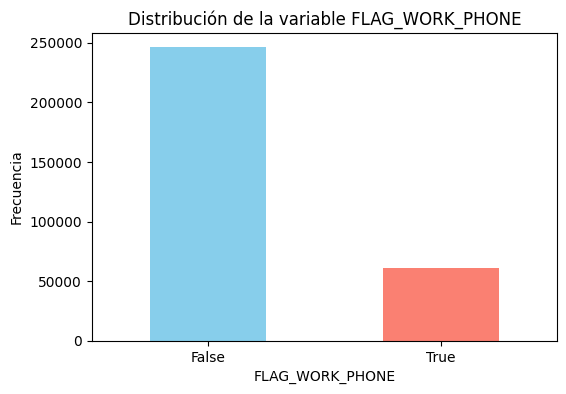

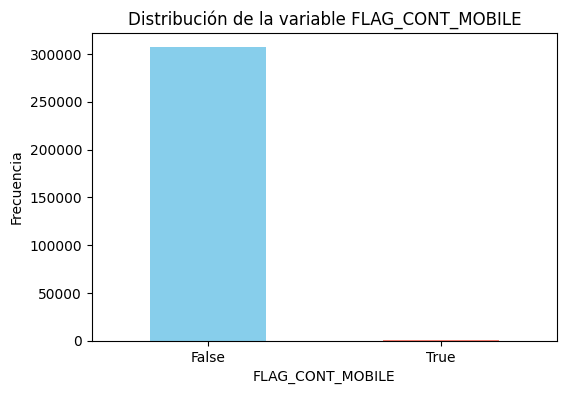

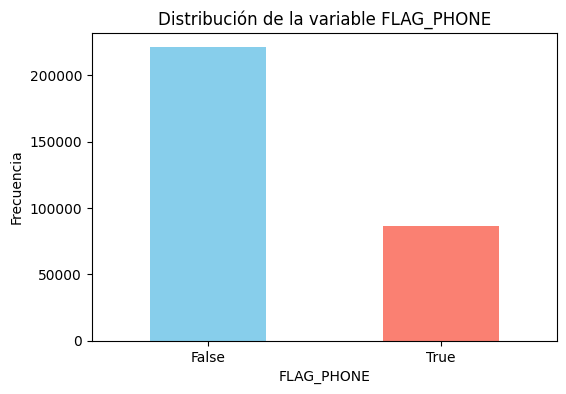

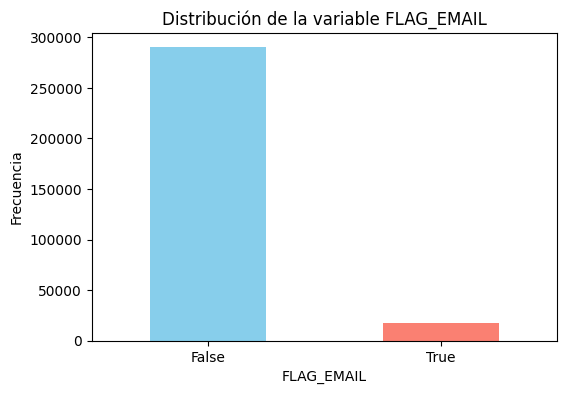

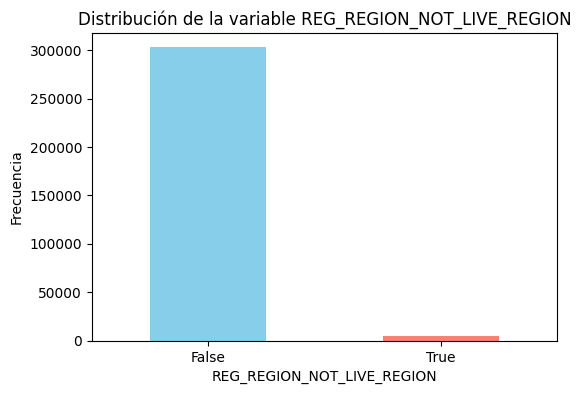

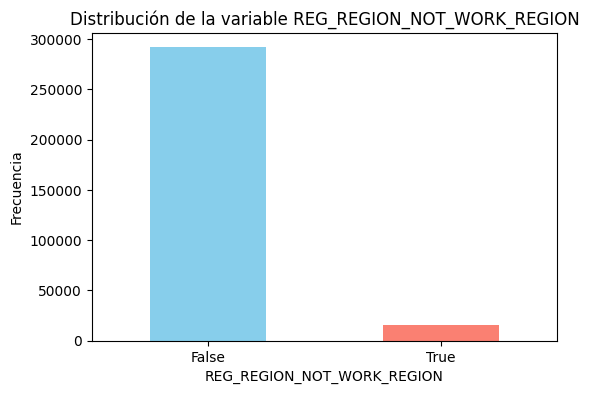

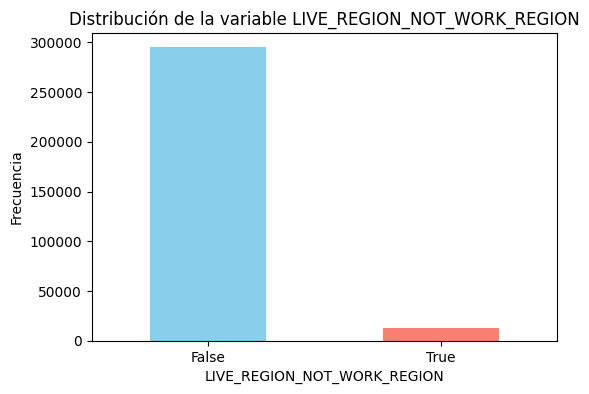

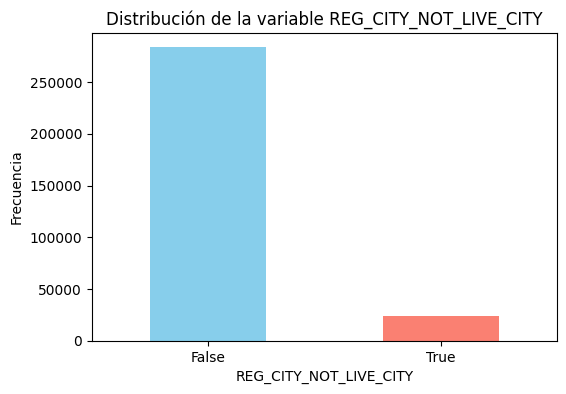

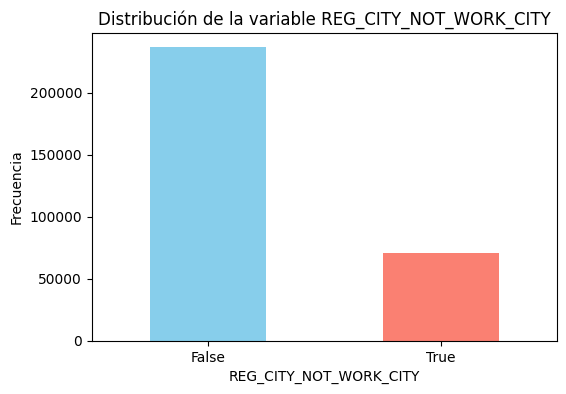

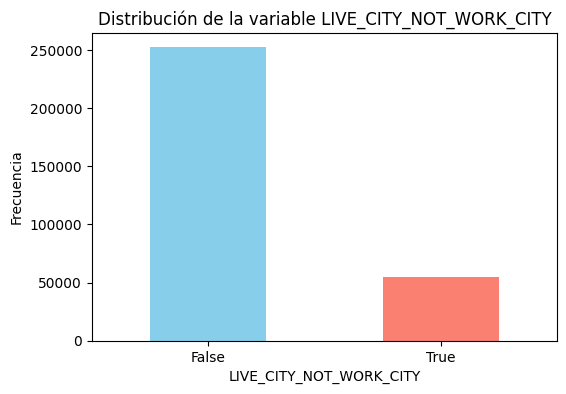

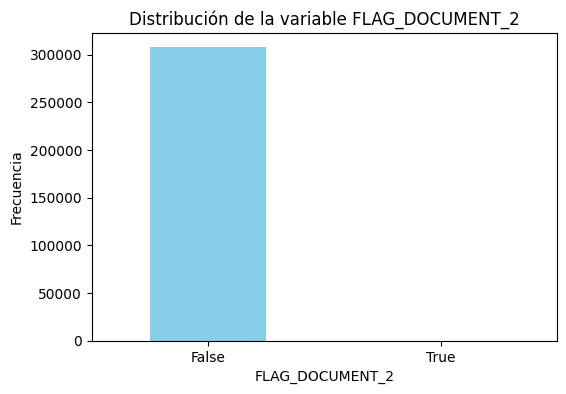

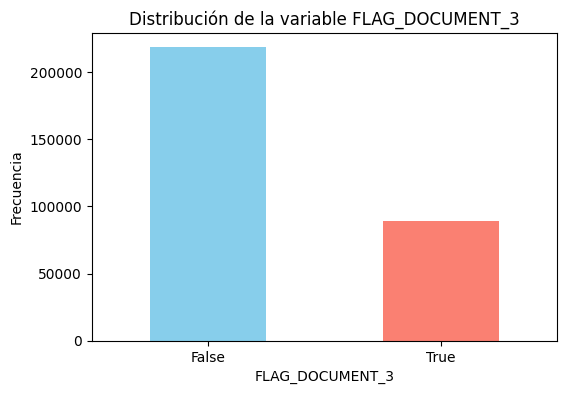

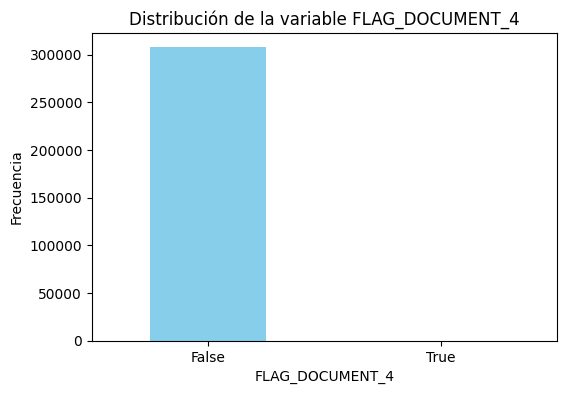

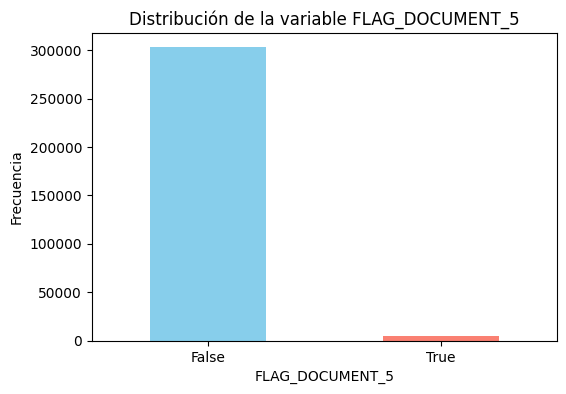

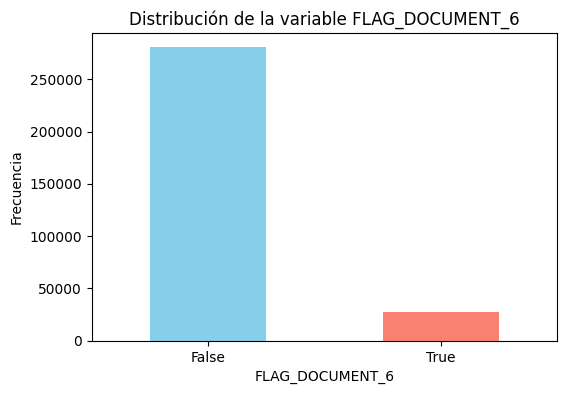

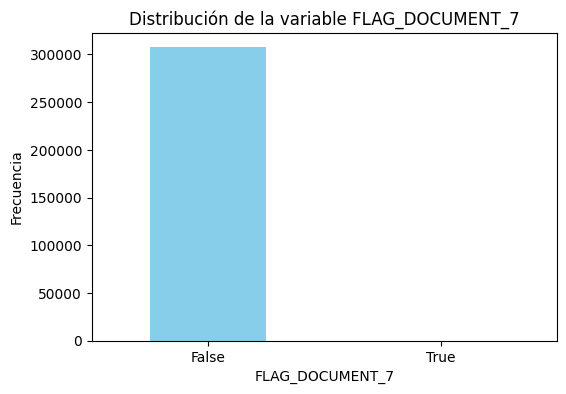

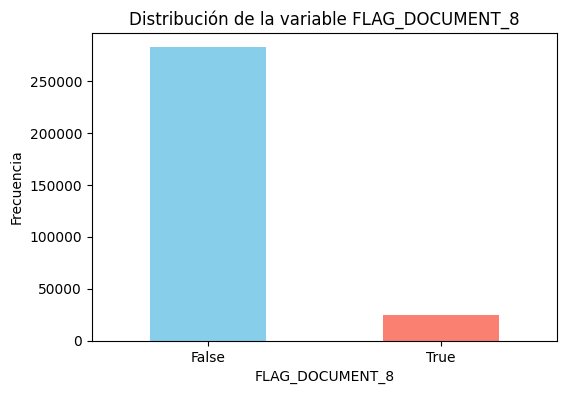

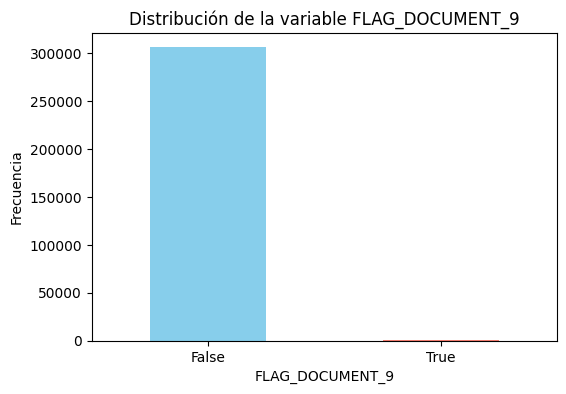

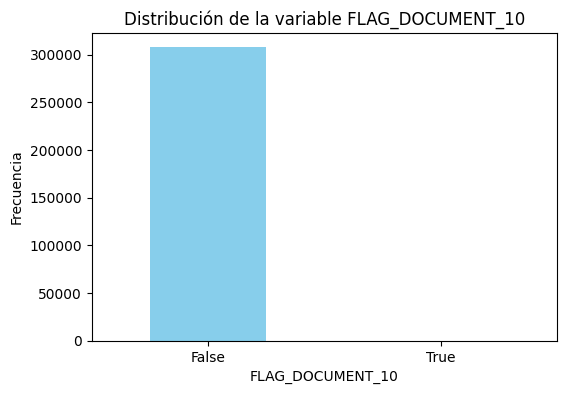

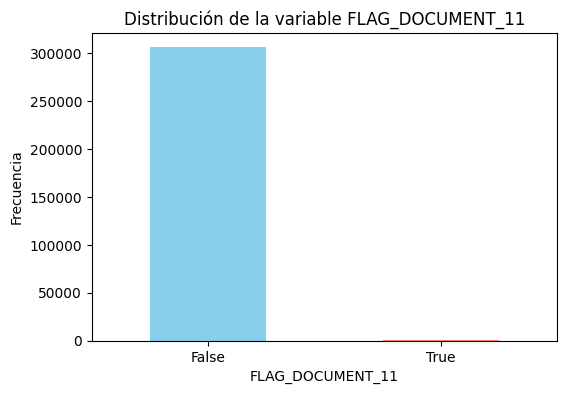

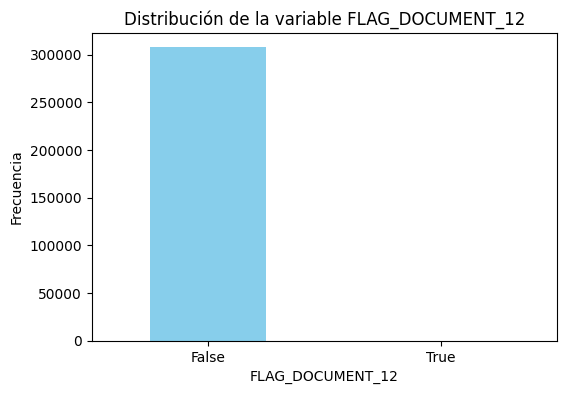

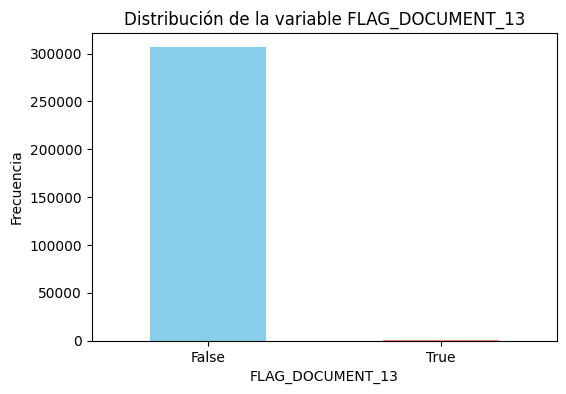

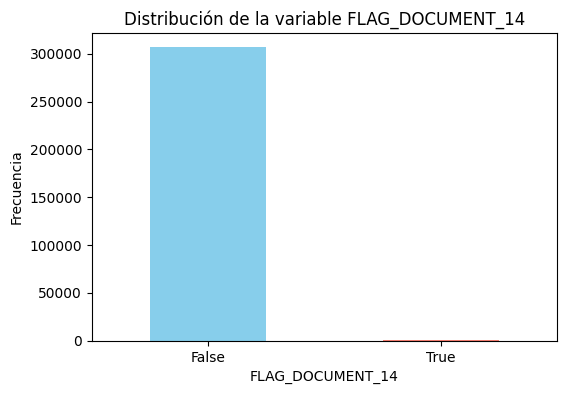

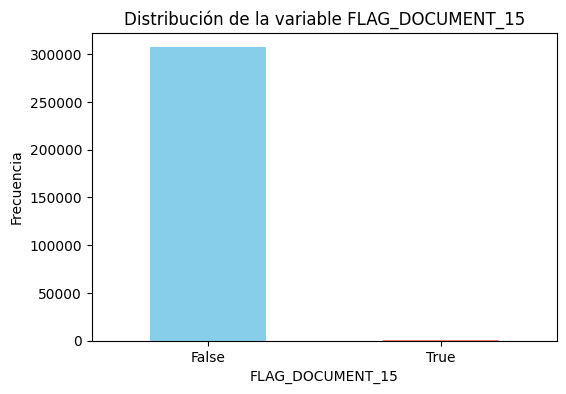

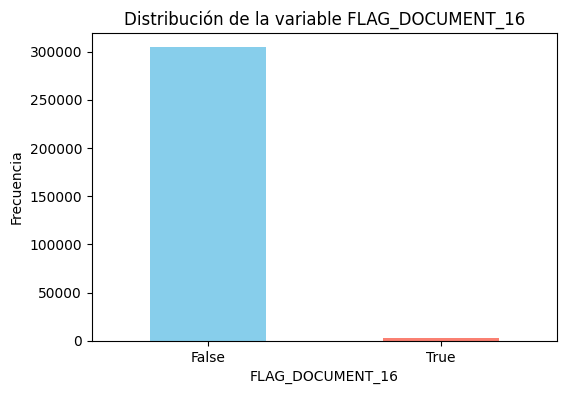

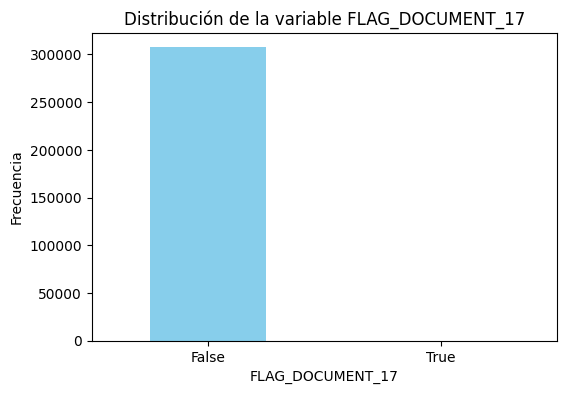

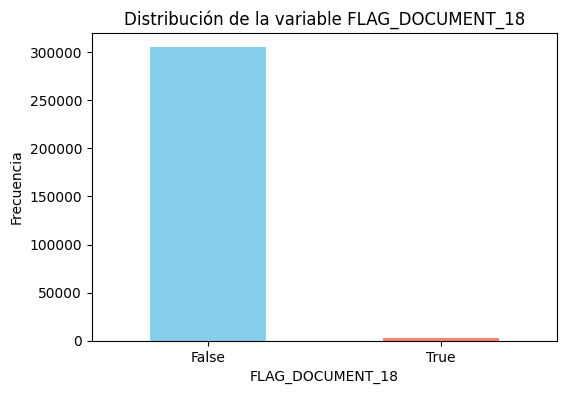

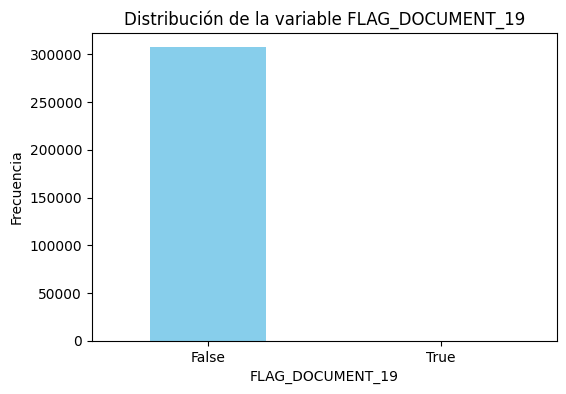

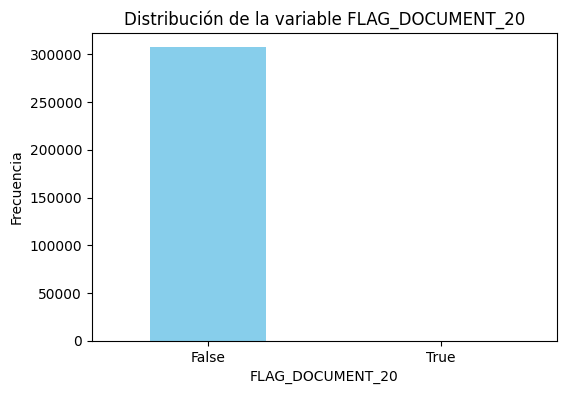

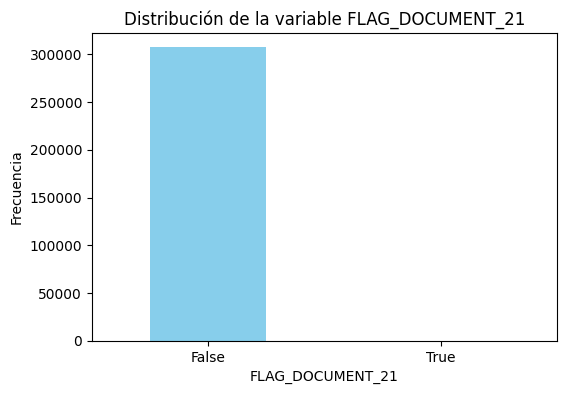

In [ ]:
# Seleccionamos las columnas booleanas
boolean_columns = df_loans.select_dtypes(include=['bool']).columns

# Crear gráficos de barras para cada variable booleana
for col in boolean_columns:
    plt.figure(figsize=(6, 4))
    df_loans[col].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title(f'Distribución de la variable {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(ticks=[0, 1], labels=['False', 'True'], rotation=0)
    plt.show()

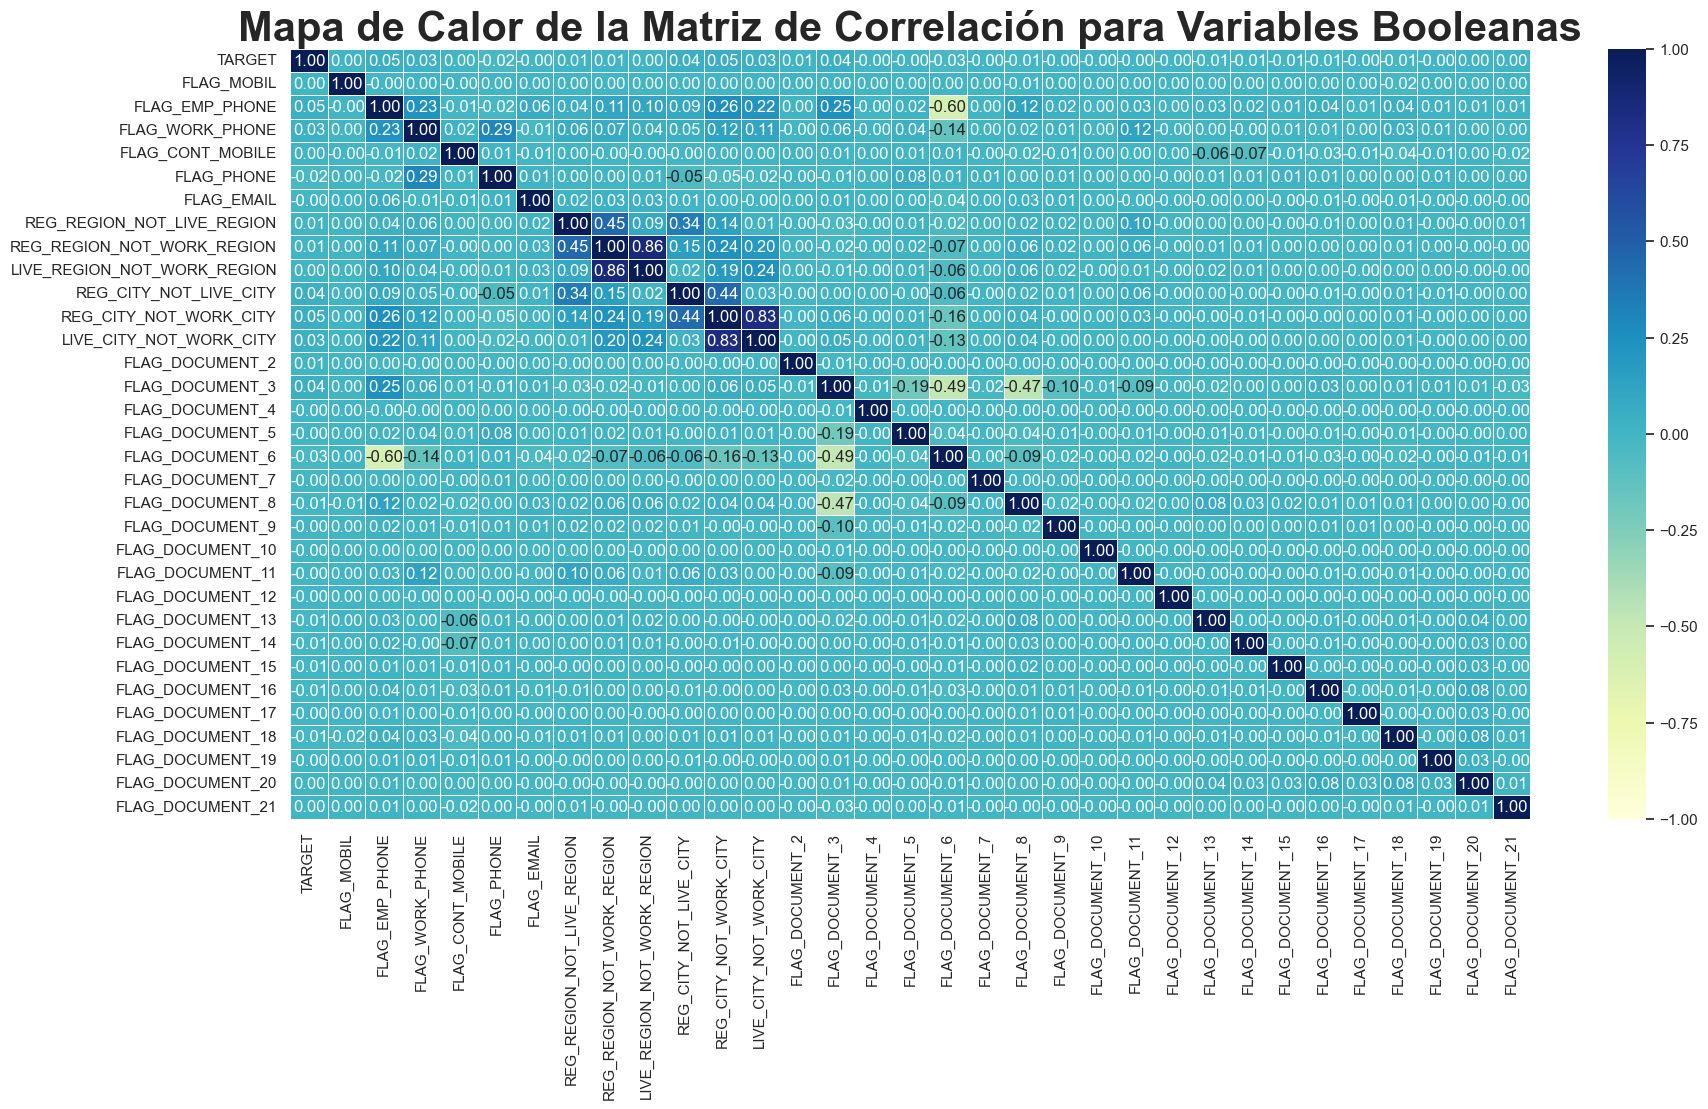

In [ ]:
# Calcular la matriz de correlación para las variables booleanas
corr_matrix = df_loans[boolean_columns].corr()

# Crear un mapa de calor para la matriz de correlación
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

# Título en negrita y más grande
plt.title('Mapa de Calor de la Matriz de Correlación para Variables Booleanas', fontweight='bold', fontsize=30)
plt.show()

##### COMENTARIO DE LA MATRIZ 

La matriz de correlación presentada muestra cómo se relacionan entre sí diferentes variables booleanas del conjunto de datos, incluyendo la variable objetivo TARGET, que indica si un cliente se retrasó en el pago. Cada celda refleja la fuerza de la correlación entre las variables.

Los valores más cercanos a 1 (en tonos oscuros) representan una relación fuerte, mientras que los valores cercanos a 0 (en tonos claros) indican poca o ninguna correlación.
Se observa que las variables REG_REGION_NOT_WORK_REGION y LIVE_REGION_NOT_WORK_REGION presentan una correlación moderada (0.45), lo que sugiere que trabajar y vivir en regiones diferentes podría estar asociado en el conjunto de datos.

En cuanto a TARGET, la mayoría de las correlaciones son bajas, con valores menores a 0.1. Esto indica que las variables booleanas analizadas tienen poca influencia directa sobre el retraso en los pagos.

Variables como FLAG_EMAIL, FLAG_PHONE, y FLAG_DOCUMENT_X presentan correlaciones muy bajas con TARGET, lo que sugiere que estas características no son determinantes en el comportamiento de pago del cliente.

En general, las correlaciones en la matriz son débiles, lo cual es común en análisis de variables booleanas. Sin embargo, es importante evaluar estas relaciones en combinación con otras variables para capturar patrones más complejos y mejorar el modelo predictivo.

In [ ]:
# Llamar a la función y guardar los resultados en variables
col_bool, col_cat, col_num = fa.categorizar_columnas(df_loans)

In [ ]:
# Asegurarte de incluir la variable TARGET
col_cat_str = list(X_df_loans_train[col_cat].select_dtypes('object').columns.values)
col_cat_str

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [ ]:
# Agregar manualmente 'TARGET' si no está ya en la lista
if 'TARGET' not in col_cat_str:
    col_cat_str.append('TARGET')

# Crear una matriz vacía para almacenar los valores de Cramér's V
cramers_matrix = pd.DataFrame(index=col_cat_str, columns=col_cat_str)

# Rellenar la matriz con los valores de Cramér's V
for col1 in col_cat_str:
    for col2 in col_cat_str:
        # Crear la tabla de contingencia
        confusion_matrix = pd.crosstab(df_loans_train[col1], df_loans_train[col2])
        # Calcular Cramér's V
        cramers_matrix.loc[col1, col2] = fa.cramers_v(confusion_matrix.values)


In [ ]:
# Convertir los valores a float para que se puedan leer adecuadamente
cramers_matrix = cramers_matrix.astype(float)

# Imprimir la matriz de Cramér's V
print(cramers_matrix)

                            NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
NAME_CONTRACT_TYPE                    0.999976     0.014134      0.005002   
CODE_GENDER                           0.014134     1.000000      0.346151   
FLAG_OWN_CAR                          0.005002     0.346151      0.999991   
FLAG_OWN_REALTY                       0.067275     0.043290      0.000936   
NAME_TYPE_SUITE                       0.014775     0.044232      0.041900   
NAME_INCOME_TYPE                      0.060643     0.120052      0.156539   
NAME_EDUCATION_TYPE                   0.068873     0.019178      0.096961   
NAME_FAMILY_STATUS                    0.048344     0.117936      0.167485   
NAME_HOUSING_TYPE                     0.027383     0.046677      0.040514   
OCCUPATION_TYPE                       0.055477     0.405319      0.264659   
WEEKDAY_APPR_PROCESS_START            0.013902     0.004309      0.002470   
ORGANIZATION_TYPE                     0.066586     0.238319      0.201992   

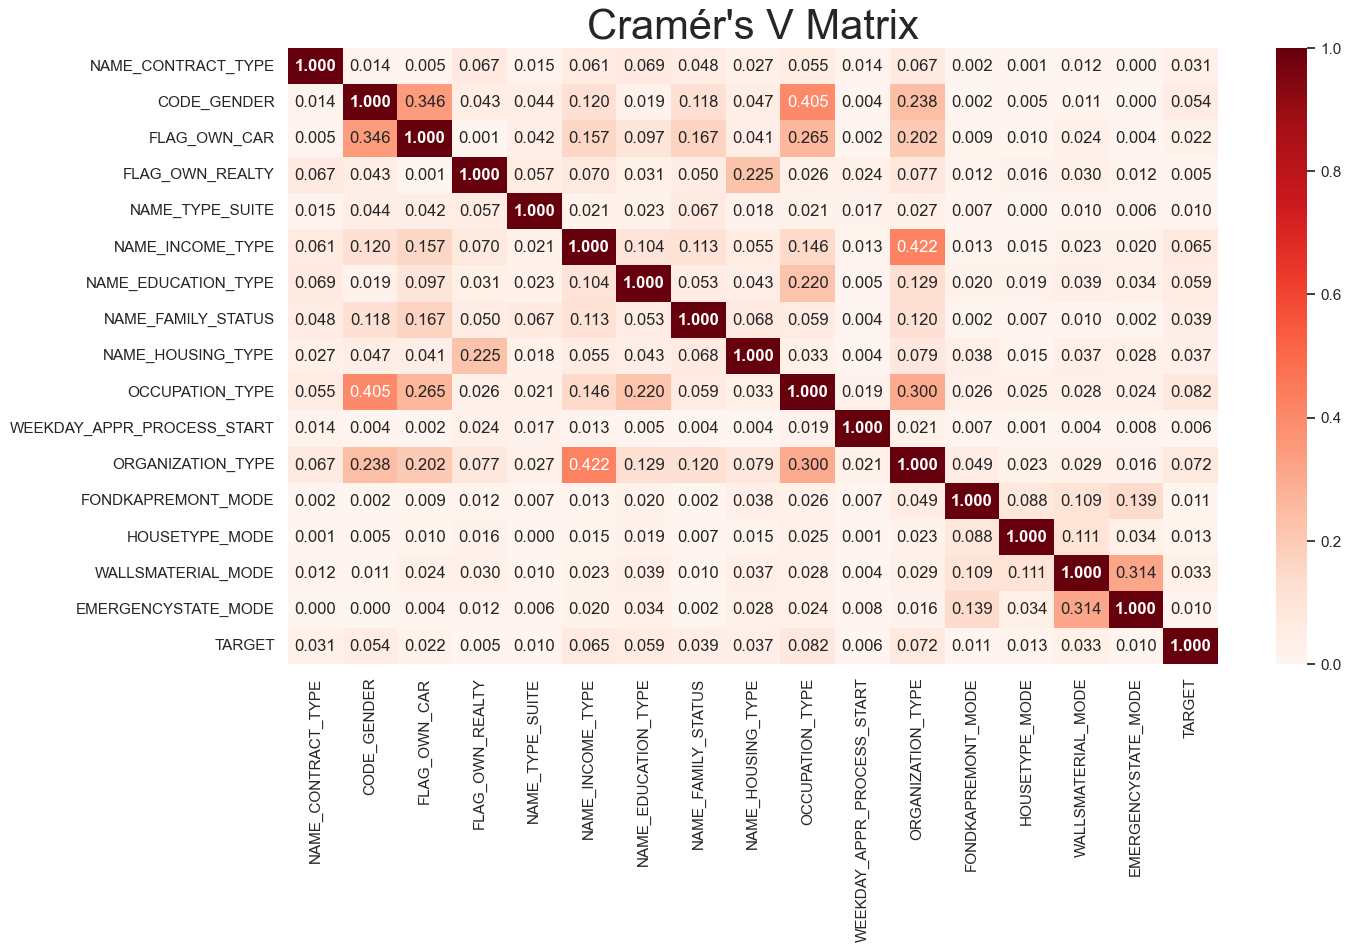

In [ ]:
# Ajustar el esquema de colores y mostrar la matriz
plt.figure(figsize=(15, 8))
sns.set(style='white')  # Estilo más limpio
# Crear el mapa de calor con colores rosas
ax = sns.heatmap(cramers_matrix, annot=True, fmt='.3f', cmap='Reds', cbar=True)

# Iterar sobre las anotaciones para poner en negrita los valores altos
for text in ax.texts:
    if float(text.get_text()) > 0.5:  # Umbral de correlación alta
        text.set_fontweight('bold')

# Añadir título y personalizarlo
plt.title('Cramér\'s V Matrix', fontdict={'size': 17},fontsize=30)
plt.show()


##### COMENTARIO DE LA MATRIZ 
La matriz de Cramér's V presentada analiza la relación entre diferentes variables categóricas del conjunto de datos, incluyendo la variable objetivo TARGET, que indica si un cliente se retrasó en el pago. Cada celda muestra la intensidad de la asociación entre las variables:

Los valores más cercanos a 1 (en tonos oscuros) indican asociaciones más fuertes, mientras que los valores próximos a 0 (en tonos claros) reflejan poca o ninguna relación.
Se destaca una relación moderada entre CODE_GENDER y OCCUPATION_TYPE (0.405), lo que podría indicar que ciertas ocupaciones son más comunes entre hombres o mujeres.
En cuanto a TARGET, las asociaciones son bajas en general, siendo ORGANIZATION_TYPE (0.072) y OCCUPATION_TYPE (0.082) las variables con mayor relación. Esto sugiere que la ocupación y el tipo de organización donde trabaja el cliente podrían tener una ligera influencia en el riesgo de retraso en los pagos.
Variables como FLAG_OWN_CAR y HOUSE_TYPE_MODE presentan correlaciones muy bajas con TARGET, indicando que estas características no están significativamente asociadas con el comportamiento de pago.
En general, las asociaciones en la matriz son débiles, lo que es común en datos categóricos. Sin embargo, las relaciones más significativas deben ser evaluadas en contexto, ya que pueden aportar información valiosa para el modelo predictivo y la toma de decisiones.

## WOE y Valor de la Información (Information Value)

#### WOE (Weight of Evidence)

**1- DEFINCIÓN**  

WOE (The Weight of Evidence) indica el poder predictivo de una variable independiente en relación con la variable dependiente. Originado en el ámbito de la evaluación crediticia, generalmente se describe como una medida de la capacidad de separación entre buenos y malos clientes. Los "Malos Clientes" se refieren a aquellos que incumplieron con el pago de un préstamo (en este caso sería aquellos clienten que tienen dificultades de pago), mientras que los "Buenos Clientes" son los que lo reembolsaron, es decir, aquellos que no tuvieron dificultades durante el reembolso.

Es decir, el WOE mide qué tan bien cada grupo de atributos puede predecir el valor deseado de la variable dependiente.
  


- Distribution of Goods - % de buenos clientes (aquellos sin dificultad de pago) en un grupo particular.
- Distribution of Bads - % de malos clientes (aquellos con dificultad de pago) en un grupo particular.
- ln - Logaritmo natural


**2- PASOS**

**Paso 1. Verifica el tipo de variable:**

    Si es continua
Divide los datos en 10 grupos (o menos, dependiendo de la distribución). Idealmente, cada grupo debe contener al menos el 5% de los casos.   

    Si es categórica

Omite este paso.

**Paso 2. Cuenta los valores buenos y malos en cada grupo:**  

"Buenos" se refieren a eventos positivos (por ejemplo, clientes que pagaron).  
"Malos" se refieren a eventos negativos (por ejemplo, clientes que incumplieron).  

**Paso 3. Calcula el % de buenos y malos**  Mediante la fórmula

**Paso 4. Calcula el WOE para cada grupo**

**Paso 5. Agrupa categorías con WOE similares:**  Si una variable tiene múltiples grupos, puedes combinarlos si tienen valores de WOE similares, ya que su comportamiento al predecir la variable objetivo será comparable. Esto simplifica el modelo y mejora la interpretabilidad.


**3- Interpretación de posibles Resultados:**

- Un WOE positivo indica que la distribución de los buenos (clientes que pagaron el préstamo) es mayor que la de los malos (clientes que incumplieron). Esto sugiere que esa categoría o grupo tiene una proporción relativamente alta de eventos positivos.

- Un WOE negativo indica que la distribución de los buenos es menor que la de los malos. Esto implica que esa categoría o grupo tiene una proporción relativamente alta de eventos negativos.

La interpretación del WOE es esencial para evaluar la relación entre una variable independiente y el comportamiento de la variable dependiente (la dificultad de pago).







#### Valor de la Información (Information Value)

El Valor de la Información (IV) y el Peso de la Evidencia (WOE) tienen una conexión directa y significativa.

El IV es un método de análisis exploratorio que ayuda a identificar qué variable en un conjunto de datos posee capacidad predictiva o impacto sobre el valor de una variable dependiente binaria específica (0 o 1). En otras palabras, es un indicador numérico que mide la capacidad general de una variable independiente 
𝑋 para predecir el comportamiento de la variable objetivo.

El Valor de la Información (IV) resulta útil para reducir el número de variables empleadas al crear un modelo de Regresión Logística, particularmente cuando existen muchas variables potenciales. El IV examina cada variable independiente de manera individual, sin tener en cuenta las otras variables predictoras. Dependiendo de los valores de IV de cada variable, se puede evaluar su poder predictivo utilizando la siguiente lógica:  


- IV < 0.02: La variable no tiene poder predictivo (no es útil para el modelo).  
- 0.02 ≤ IV < 0.1: La variable tiene un poder predictivo débil.    
- 0.1 ≤ IV < 0.3: La variable tiene un poder predictivo moderado.  
- IV ≥ 0.3: La variable tiene un poder predictivo fuerte (puede ser muy influyente en el modelo).  

Este enfoque permite priorizar las variables más relevantes y descartar aquellas que no aportan valor significativo al modelo, optimizando tanto su precisión como su eficiencia.

#### 1- Variables catgoricas (WOE y IV)

In [18]:
# Función para calcular WOE e IV para variables categóricas
def calculate_woe_iv_cat(df, feature, target):
    """
    Calcula el Weight of Evidence (WoE) y el Information Value (IV) para una variable categórica.
    
    Args:
        df (DataFrame): DataFrame que contiene los datos.
        feature (str): Nombre de la variable categórica.
        target (str): Nombre de la variable objetivo (debe ser binaria: 0/1).

    Returns:
        DataFrame: Tabla con los valores de WoE e IV para cada categoría y el IV total.
    """
    # Crear una tabla de contingencia para la variable actual
    grouped = df.groupby(feature)[target].value_counts().unstack(fill_value=0)
    
    # Calcular las proporciones de buenos y malos por cada categoría
    grouped['good_pct'] = grouped[1] / grouped[1].sum()
    grouped['bad_pct'] = grouped[0] / grouped[0].sum()

    # Agregar un pequeño valor (epsilon) para evitar división por 0
    epsilon = 1e-6
    grouped['good_pct'] += epsilon
    grouped['bad_pct'] += epsilon

    # Calcular el WOE
    grouped['WOE'] = np.log(grouped['bad_pct'] / grouped['good_pct'])

    # Calcular el IV para cada categoría
    grouped['IV'] = (grouped['bad_pct'] - grouped['good_pct']) * grouped['WOE']

    # Calcular el IV total
    iv_total = grouped['IV'].sum()

    # Agregar una columna con el nombre de la variable y el IV total
    grouped['Feature'] = feature
    grouped['IV_Total'] = iv_total

    return grouped[['WOE', 'IV', 'Feature', 'IV_Total']]

In [19]:
# Calcular y mostrar el WOE e IV para cada variable categórica
categoric_val = df_loans.select_dtypes(['category', 'object']).columns

for var in categoric_val:
    print(f"Resultados para la variable categórica: {var}")
    try:
        # Calcular WOE e IV
        woe_iv = calculate_woe_iv_cat(df_loans, var, 'TARGET')
        
        # Imprimir los resultados
        print(woe_iv[['WOE', 'IV']])  # Muestra solo las columnas WOE e IV por categoría
        print(f"IV Total para {var}: {woe_iv['IV_Total'].iloc[0]:.4f}")  # IV Total
    except Exception as e:
        print(f"Error procesando la variable {var}: {e}")
        
    if (woe_iv['IV_Total'] < 0.02).any():
        print(f"La variable {var} no es relevante para el modelo.")
    elif (woe_iv['IV_Total'] >= 0.02).any() and (woe_iv['IV_Total'] < 0.1).any():
        print(f"La variable {var} tiene un impacto moderado en el modelo.")
    else:
        print(f"La variable {var} tiene un impacto fuerte en el modelo.")
    print("\n" + "-" * 50 + "\n")

Resultados para la variable categórica: NAME_CONTRACT_TYPE
TARGET                   WOE        IV
NAME_CONTRACT_TYPE                    
Cash loans         -0.036236  0.001206
Revolving loans     0.415538  0.013832
IV Total para NAME_CONTRACT_TYPE: 0.0150
La variable NAME_CONTRACT_TYPE no es relevante para el modelo.

--------------------------------------------------

Resultados para la variable categórica: CODE_GENDER
TARGET            WOE        IV
CODE_GENDER                    
F            0.154307  0.014696
M           -0.250931  0.023901
XNA          2.717999  0.000038
IV Total para CODE_GENDER: 0.0386
La variable CODE_GENDER tiene un impacto moderado en el modelo.

--------------------------------------------------

Resultados para la variable categórica: FLAG_OWN_CAR
TARGET             WOE        IV
FLAG_OWN_CAR                    
N            -0.056242  0.002137
Y             0.117353  0.004459
IV Total para FLAG_OWN_CAR: 0.0066
La variable FLAG_OWN_CAR no es relevante para

#### Resultados del WOE y DE IV de variables categóricas

A partir del Information value se puede analizar el impacto que tiene una variable en el modelo. En el caso de las variables categóricas no se encuentra ninguna que tenga un impacto grande en el modelo. Destaca que la mayoría de las variables categóricas no son relevantes para el modelo. Asimismo, se han encontrado varias variables que se consideran moderadamente relevantes. Estas variables son CODE_GENDER, NAME_INCOME_TYPE, NAME_FAMILY_STATUS, OCCUPATION_TYPE.

**Variable CODE_GENDER**

- Género F (Femenino) tiene un WOE positivo de **0.1543**, lo que indica que las observaciones de esta categoría tienen una mayor probabilidad de ser "buenas" (valor `1` en `TARGET`) en comparación con las malas.    

- M (Masculino) tiene un WOE negativo de **-0.2509**, lo que indica que las observaciones de esta categoría tienen una mayor probabilidad de ser "malas" (valor `0` en `TARGET`) en comparación con las buenas.  

- XNA tiene un WOE extremadamente alto de **2.7180**, lo que podría sugerir que es una categoría con muy pocas observaciones o un `valor atípico`. Este valor podría necesitar un análisis adicional, ya que podría indicar un comportamiento inusual en los datos.


**Variable NAME_INCOME_TYPE**

El análisis de **WOE (Weight of Evidence)** para la variable **NAME_INCOME_TYPE** muestra lo siguiente:

- **Businessman** tiene un WOE muy alto de **3.5939**, lo que indica una gran probabilidad de ser "bueno" (valor `1` en `TARGET`).
- **Student** también tiene un WOE positivo de **4.1694**, sugiriendo una mayor probabilidad de ser "bueno".
- **Pensioner** y **State servant** tienen WOE positivos de **0.4334** y **0.3633** respectivamente, lo que también señala una mayor probabilidad de ser "bueno".
  
Por otro lado, las categorías con WOE negativo son:
- **Maternity leave** tiene un WOE negativo de **-1.9493**, lo que sugiere una alta probabilidad de ser "mala" (valor `0` en `TARGET`).
- **Unemployed** tiene un WOE negativo de **-1.8560**, lo que indica una mayor probabilidad de ser "mala".
- **Working** tiene un WOE negativo de **-0.1887**, con un impacto negativo más leve en la probabilidad de ser "mala".
  
En resumen, **Businessman** y **Student** están asociadas con una alta probabilidad de ser "buenos", mientras que **Maternity leave** y **Unemployed** están asociadas con una mayor probabilidad de ser "malos". **Pensioner** y **State servant** tienen una probabilidad moderada de ser "buenos", mientras que **Working** muestra una probabilidad más equilibrada. El IV total para esta variable es **0.0587**, lo que indica una importancia moderada de esta variable para predecir el **TARGET**.

**NAME_FAMILY_STATUS**

El análisis de **WOE (Weight of Evidence)** para la variable **NAME_FAMILY_STATUS** muestra que:

- **Widow** tiene un WOE positivo de **0.3506**, lo que sugiere que las personas en esta categoría tienen una mayor probabilidad de ser "buenas" (valor `1` en `TARGET`).
- **Married** tiene un WOE positivo de **0.0712**, lo que también indica una mayor probabilidad de ser "bueno".
- **Unknown** tiene un WOE extremadamente alto de **2.0888**, aunque este valor es muy atípico, lo que puede indicar una categoría con pocos registros o casos atípicos.

Por otro lado, las categorías con WOE negativo son:
- **Civil marriage** tiene un WOE negativo de **-0.2291**, lo que indica una mayor probabilidad de ser "mala" (valor `0` en `TARGET`).
- **Single / not married** tiene un WOE negativo de **-0.2137**, lo que también indica una mayor probabilidad de ser "mala".
- **Separated** tiene un WOE ligeramente negativo de **-0.0162**, pero la diferencia es pequeña.

En resumen, **Widow** y **Married** están asociadas con una mayor probabilidad de ser "buenas", mientras que **Civil marriage** y **Single / not married** están asociadas con una mayor probabilidad de ser "malas". **Unknown** tiene un WOE elevado, lo que podría necesitar una revisión más detallada.

**VARIABLE OCCUPATION_TYPE**

El análisis de **WOE (Weight of Evidence)** para la variable **OCCUPATION_TYPE** muestra que:

- **Accountants** tiene un WOE positivo de **0.6406**, lo que sugiere que esta ocupación tiene una mayor probabilidad de ser "buena" (valor `1` en `TARGET`).
- **Managers** también tiene un WOE positivo de **0.3740**, indicando una probabilidad de ser "bueno" más alta.
- **Core staff** tiene un WOE positivo de **0.3587**, lo que implica una mayor probabilidad de ser "bueno".
  
En cuanto a las ocupaciones con WOE negativo:
- **Low-skill Laborers** tiene un WOE muy bajo de **-0.7652**, indicando que esta ocupación tiene una alta probabilidad de ser "mala" (valor `0` en `TARGET`).
- **Drivers**, **Laborers**, y **Waiters/barmen staff** tienen WOE negativos, lo que indica que tienen una probabilidad mayor de ser "malas".
  
En resumen, las ocupaciones con WOE positivo, como **Accountants** y **Managers**, están asociadas con una mayor probabilidad de "buenas", mientras que las ocupaciones con WOE negativo, como **Low-skill Laborers**, están asociadas con una mayor probabilidad de "malas".

In [15]:
df_loans_train.to_csv('../data/interim/df_loans_train.csv') # luego se separará nuevamente en X e y a la hora de modelar.
df_loans_test.to_csv('../data/interim/df_loans_test.csv') # lo mismo para el test, se  va a separar luego para no guardar dos csv separados.
